**Facebook Marketplace Dataset**

---


The Facebook Live Sellers in Thailand dataset contains information about the Facebook pages of 10 Thai fashion and cosmetics retail sellers.


In [1]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Facebook_Marketplace_data.csv')
dataset.head()

# print(dataset['status_type'].value_counts())

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
#identify the empty columns in the dataset
nan_columns = dataset.columns[dataset.isnull().all()].tolist()
print('empty columns in the dataframe are', nan_columns)

empty columns in the dataframe are ['Column1', 'Column2', 'Column3', 'Column4']


In [4]:
#drop the empty columns
dataset.drop(columns=nan_columns, inplace=True)
# print(dataset)

In [5]:
#see if there are any missing values
any_missing = dataset.isnull().values.any()
print(any_missing)
print(dataset.isnull().sum())


False
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


1.How does the time of upload (`status_published`)  affects the `num_reaction`? <br>
Ans :-

In [7]:
#Convert the status_published column into datetime format to extract the upload_hour for plot
dataset['status_published'] = pd.to_datetime(dataset['status_published'], format='%m/%d/%Y %H:%M')
dataset['upload_hour'] = dataset['status_published'].dt.hour

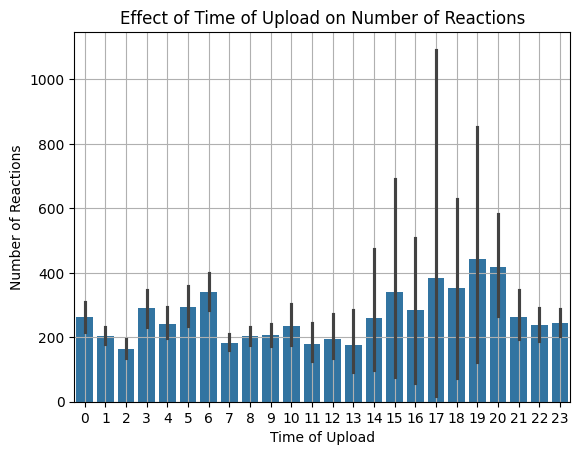

In [8]:
#perform exploratory data analysis
sns.barplot(x='upload_hour', y='num_reactions', data=dataset)
plt.xlabel('Time of Upload')
plt.ylabel('Number of Reactions')
plt.title('Effect of Time of Upload on Number of Reactions')
plt.grid(True)
plt.show()

This seaborn barplot shows that the number of reactions received on status posts varies according to the time of upload. It is highest during 2 PM to 8 PM, peaking at 5 PM, and remains fairly low the rest of the time.

2.	Is there a correlation between the number of reactions (`num_reactions`) and other engagement metrics such as comments (`num_comments`) and shares (`num_shares`)? If so, what is the strength and direction of this correlation? <br>Ans:-

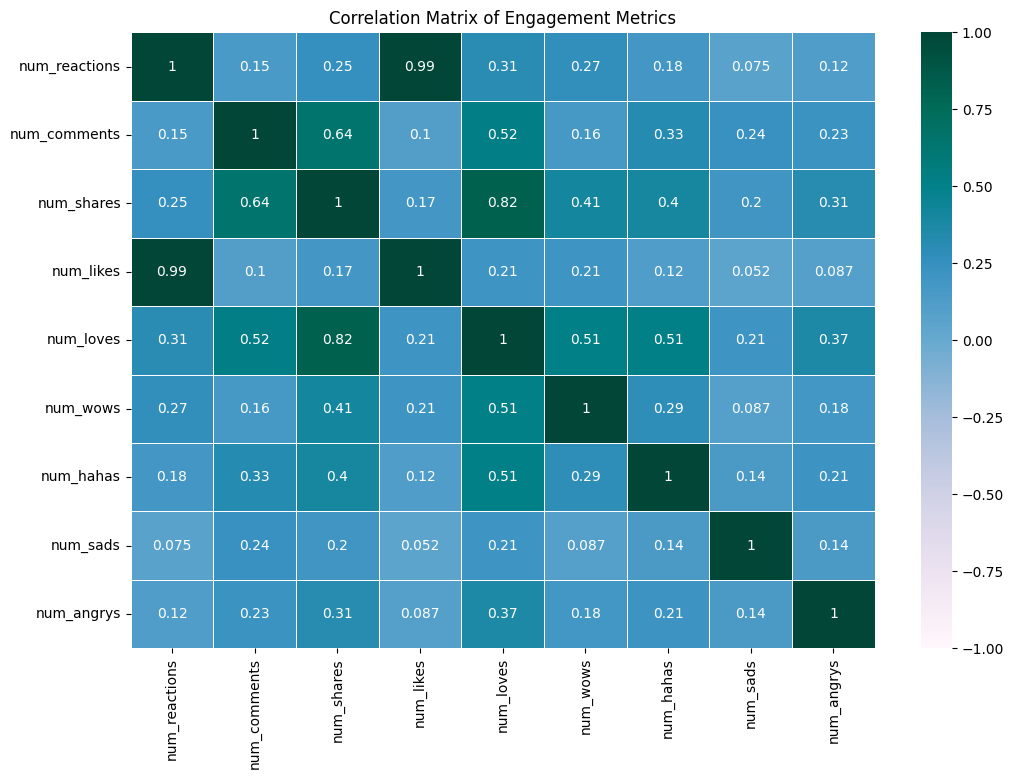

In [9]:
correlation_matrix = dataset[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()
# Creating a seaborn heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()


As we know 1 suggests a perfect correlation. 0.3 - 0.7 suggests a moderate correlation and 0 - 0.3 suggests a weak correlation.
<br>
We can deduce from the heatmap that, number of likes of status post is **strongly correlated** to number of reactions on status posts because of a correlation score of 0.99.

We can also see a correlation score of 0.82 between number of loves and number of shares which shows that people share status posts if they love it. So the correlation is **strong**

Number of loves has a **moderate** correlation with number of number of comments. Number of wows is **moderately** correlated to number of shares and number of loves.

Rest all parameters are weakly correlated.

**PLEASE RUN AND TEST Q5 AND Q6 HERE BEFORE DATA GET PREPROCESSED TO GET ACCURATE RESULTS**

3.	Use the columns `status_type`, `num_reactions`, `num_comments`, `num_shares`, `num_likes`, `num_loves`, `num_wows`, `num_hahas`, `num_sads`, and `num_angrys` to train a K-Means clustering model on the Facebook Live Sellers dataset. <br>
Ans :-

In [10]:
#first encode categorical data using one hot encoding
status_type_counts = dataset['status_type'].value_counts()
print(status_type_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [11]:
dataset.drop('status_published', axis=1, inplace=True)
print("Dropped 'status_published' column.")

Dropped 'status_published' column.


In [30]:
print(dataset.dtypes)

status_id         int64
status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
upload_hour       int32
cluster           int32
dtype: object


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#column tranform the data set
categorical_transformer = OneHotEncoder(sparse=False)  #sparse=False for dense output
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
    transformers=[
        ('encoder', categorical_transformer, ['status_type']),
        ('scaler', numerical_transformer, list(dataset.drop('status_type', axis=1).columns))  # Standardize other columns
    ]
)

# Apply transformation
dataset_transformed = transformer.fit_transform(dataset)

print("Transformed dataset:")
print(dataset_transformed[:5])  # Print the first 5 rows


Transformed dataset:
[[ 0.          0.          0.          1.         -1.73180514  0.64610394
   0.32335035  1.6868788   0.48272661  1.98326643  0.1961959   0.07671305
   0.47357035 -0.15574803 -0.26566892]
 [ 0.          1.          0.          0.         -1.73131378 -0.17319166
  -0.25220622 -0.3041444  -0.14472021 -0.3184544  -0.147879   -0.17600986
  -0.152587   -0.15574803  2.05774975]
 [ 0.          0.          0.          1.         -1.73082242 -0.00673846
   0.01308938  0.12901714 -0.02457082  0.2069384  -0.03318737  0.07671305
  -0.152587   -0.15574803 -0.26566892]
 [ 0.          1.          0.          0.         -1.73033106 -0.25749912
  -0.25220622 -0.3041444  -0.23149477 -0.3184544  -0.147879   -0.17600986
  -0.152587   -0.15574803 -0.84652359]
 [ 0.          1.          0.          0.         -1.7298397  -0.03700268
  -0.25220622 -0.3041444  -0.02457082 -0.09328605 -0.147879   -0.17600986
  -0.152587   -0.15574803 -0.70130992]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-33-e67e6aba31ab>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


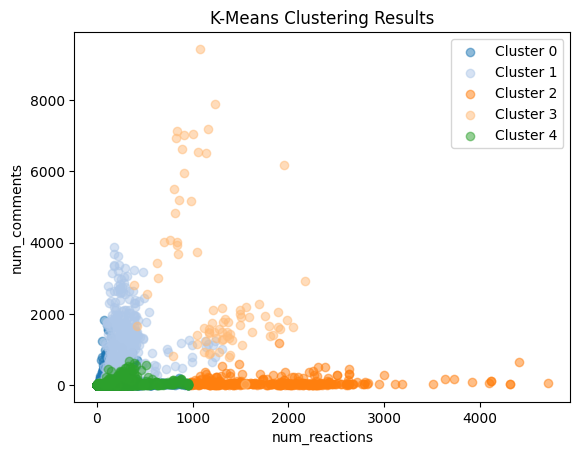

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(dataset_transformed)

cluster_labels = kmeans.predict(dataset_transformed)

dataset['cluster'] = cluster_labels

feature_names = list(dataset.drop('status_type', axis=1).columns)

features_to_plot = ['num_reactions', 'num_comments']  # Replace with any feature names

data_to_plot = dataset[features_to_plot]


cmap = plt.cm.get_cmap('tab20')
cluster_colors = [cmap(i) for i in range(len(set(cluster_labels)))]  # Colors for each cluster
for cluster in range(5):
  plt.scatter(data_to_plot[cluster_labels == cluster][features_to_plot[0]],
              data_to_plot[cluster_labels == cluster][features_to_plot[1]],
              label=f'Cluster {cluster}', alpha=0.5, color=cluster_colors[cluster])

plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()



4.	Use the elbow method to find the optimum number of clusters. <br> Ans :-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

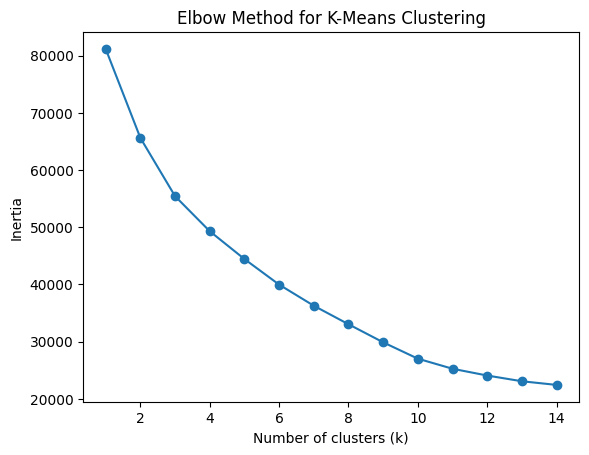

In [26]:
from sklearn.cluster import KMeans
inertias = []
k_range = range(1, 15)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(dataset_transformed)
  inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

We can observe the elbow at 10. so we should choose 10 clusters

5.	What is the count of different types of posts in the dataset? <br> Ans :-

In [ ]:
print(dataset['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


So the number of status photo = 4288, video = 2334, status = 365 and link = 63.

6.	What is the average value of num_reaction, num_comments, num_shares for each post type? <br> Ans :-

In [ ]:
print(dataset.groupby('status_type')['num_reactions'].mean())
print(dataset.groupby('status_type')['num_comments'].mean())
print(dataset.groupby('status_type')['num_shares'].mean())

status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64
status_type
link        5.698413
photo      15.993470
status     36.238356
video     642.478149
Name: num_comments, dtype: float64
status_type
link        4.396825
photo       2.553871
status      2.558904
video     115.679949
Name: num_shares, dtype: float64
